# Check dataflow

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os 
import sys

In [3]:
root_path = os.path.abspath("..")
if root_path not in sys.path:
    sys.path.append(root_path)

In [4]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [5]:
from common.dataflow import get_train_df, get_test_df, get_image, get_target, get_inc_angle
from common.dataflow_visu_utils import display_image
from common.dataflow import IcebergDataset

In [6]:
from common.dataflow_visu_utils import display_dataset, display_data_augmentations, display_batches

In [7]:
trainval_ds = IcebergDataset('Train')
test_ds = IcebergDataset('Test')

x:  <class 'numpy.ndarray'> (75, 75, 2) -38.2114 -0.213149 -41.1359 -11.2522
y:  <class 'numpy.int64'> ()
x:  <class 'numpy.ndarray'> (75, 75, 2) -23.1253 12.5704 -34.7658 0.044052
y:  <class 'numpy.int64'> ()
x:  <class 'numpy.ndarray'> (75, 75, 2) -33.3912 -9.91848 -34.1488 -15.6059
y:  <class 'numpy.int64'> ()
x:  <class 'numpy.ndarray'> (75, 75, 2) -32.2041 4.79563 -39.5641 -5.55452
y:  <class 'numpy.int64'> ()
x:  <class 'numpy.ndarray'> (75, 75, 2) -35.0105 -6.95604 -40.2761 -9.43401
y:  <class 'numpy.int64'> ()
x:  <class 'numpy.ndarray'> (75, 75, 2) -29.7157 3.86404 -37.674 -9.12756
y:  <class 'numpy.int64'> ()
x:  <class 'numpy.ndarray'> (75, 75, 2) -35.9261 -10.3501 -36.8422 -17.4397
y:  <class 'numpy.int64'> ()
x:  <class 'numpy.ndarray'> (75, 75, 2) -37.3003 -13.9976 -37.2979 -22.1081
y:  <class 'numpy.int64'> ()
x:  <class 'numpy.ndarray'> (75, 75, 2) -25.7325 28.5789 -34.252 -1.07451
y:  <class 'numpy.int64'> ()
x:  <class 'numpy.ndarray'> (75, 75, 2) -36.0653 -5.6063 -38

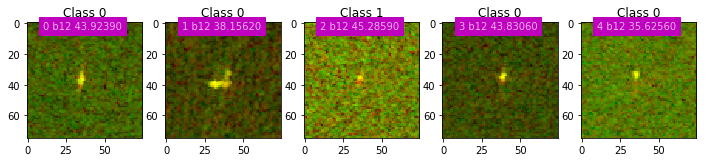

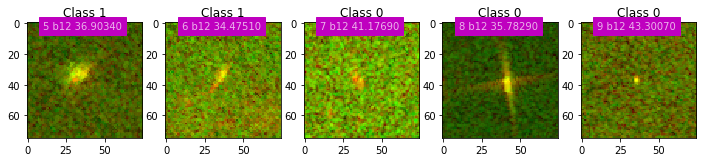

In [8]:
display_dataset(trainval_ds, max_datapoints=10, show_info=True)

In [10]:
%%timeit -r2 -n5
for (x, a), y in trainval_ds:
    x.sum()

1.26 s ± 10.5 ms per loop (mean ± std. dev. of 2 runs, 5 loops each)


x:  <class 'numpy.ndarray'> (75, 75, 2) -26.7006 7.28603 -34.3635 -16.2145
y:  <class 'str'> 8
x:  <class 'numpy.ndarray'> (75, 75, 2) -34.1768 -10.5493 -38.1012 -10.7599
y:  <class 'str'> 8
x:  <class 'numpy.ndarray'> (75, 75, 2) -34.0697 18.9681 -37.5925 19.0644
y:  <class 'str'> 8
x:  <class 'numpy.ndarray'> (75, 75, 2) -27.2938 1.69518 -35.0941 -6.58381
y:  <class 'str'> 8
x:  <class 'numpy.ndarray'> (75, 75, 2) -33.387 -8.12234 -35.8867 -8.77815
y:  <class 'str'> 8
x:  <class 'numpy.ndarray'> (75, 75, 2) -32.5693 6.89931 -30.9879 5.77728
y:  <class 'str'> 8
x:  <class 'numpy.ndarray'> (75, 75, 2) -37.1353 -5.83 -39.6348 -14.7732
y:  <class 'str'> 8
x:  <class 'numpy.ndarray'> (75, 75, 2) -29.9917 3.36454 -36.9303 -13.8703
y:  <class 'str'> 8
x:  <class 'numpy.ndarray'> (75, 75, 2) -33.0868 15.5735 -37.3044 0.552376
y:  <class 'str'> 8
x:  <class 'numpy.ndarray'> (75, 75, 2) -26.622 11.1458 -33.5917 5.93408
y:  <class 'str'> 8


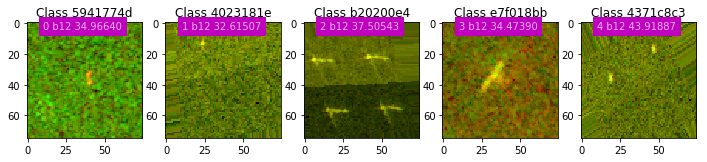

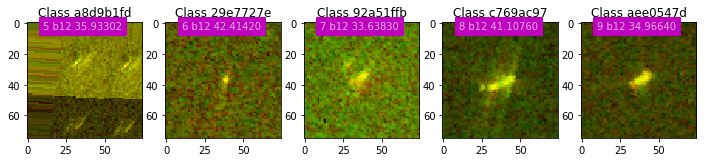

In [14]:
display_dataset(test_ds, max_datapoints=10, show_info=True)

Compute min, max, mean on the train dataset

In [16]:
def compute_min_max_mean(ds):
    min_vals = [] 
    max_vals = []
    mean_vals = []
    for (x, a), y in ds:
        min_vals.append((x[:, :, 0].min(), x[:, :, 1].min()))
        max_vals.append((x[:, :, 0].max(), x[:, :, 1].max()))
        mean_vals.append((x[:, :, 0].mean(), x[:, :, 1].mean()))

    min_vals = np.array(min_vals)
    max_vals = np.array(max_vals)
    mean_vals = np.array(mean_vals)
    return min_vals, max_vals, mean_vals

train_min_vals, train_max_vals, train_mean_vals = compute_min_max_mean(trainval_ds)
test_min_vals, test_max_vals, test_mean_vals = compute_min_max_mean(test_ds)

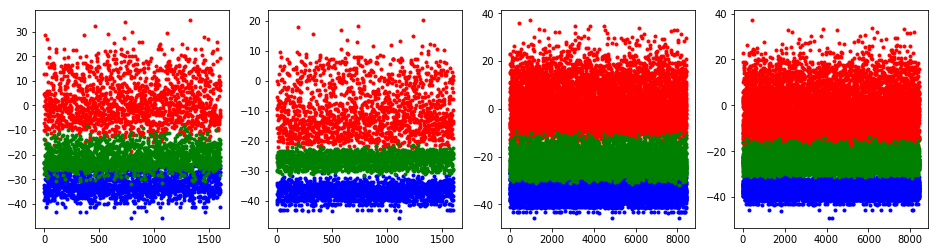

In [18]:
plt.figure(figsize=(16, 4))
plt.subplot(141)
plt.plot(train_min_vals[:, 0], 'b.', label='mins')
plt.plot(train_max_vals[:, 0], 'r.', label='maxs')
plt.plot(train_mean_vals[:, 0], 'g.', label='mean')
plt.subplot(142)
plt.plot(train_min_vals[:, 1], 'b.', label='mins')
plt.plot(train_max_vals[:, 1], 'r.', label='maxs')
plt.plot(train_mean_vals[:, 1], 'g.', label='mean')

plt.subplot(143)
plt.plot(test_min_vals[:, 0], 'b.', label='mins')
plt.plot(test_max_vals[:, 0], 'r.', label='maxs')
plt.plot(test_mean_vals[:, 0], 'g.', label='mean')
plt.subplot(144)
plt.plot(test_min_vals[:, 1], 'b.', label='mins')
plt.plot(test_max_vals[:, 1], 'r.', label='maxs')
plt.plot(test_mean_vals[:, 1], 'g.', label='mean')

In [11]:
np.percentile(mean_vals, q=50.0, axis=0), np.percentile(max_vals, q=97.0, axis=0) - np.percentile(min_vals, q=3.0, axis=0)

(array([-21.04982662, -26.15313911]), array([ 59.87096096,  48.35116971]))

In [9]:
import torch
from common.torch_common_utils.dataflow import TransformedDataset, OnGPUDataLoader
from common.dataflow import get_data_transforms

In [10]:
CONFIG = {
   "train_aug": {
    "Compose": {
      "transforms": [{
        "RandomChoice": {
          "transforms": [{
            "RandomAffine": {
              "translate": [0.1, 0.1],
              "rotation": [-90, 90],
              "interpolation": 0}}, {
            "RandomFlip": {
              "mode": "h",
              "proba": 0.75}}, {
            "RandomFlip": {
              "mode": "v",
              "proba": 0.75
            }}]}
      }, { "_ToTensor": {}}]}
  },

  "test_aug": {
    "Compose": {
      "transforms": [
        {"RandomAffine": {"translate": [0.05, 0.05], 
                            "rotation": [-2, 2],                                             
                            "interpolation": 0}},        
        {"RandomFlip": {"mode": "h", "proba": 0.5}},
        {"RandomFlip": {"mode": "v", "proba": 0.5}},
        {"_ToTensor": {}},
      ]
    }
  }    
}


train_aug = get_data_transforms(CONFIG['train_aug'])
test_aug = get_data_transforms(CONFIG['test_aug'])

In [11]:
from functools import partial

def x_transform(x, aug_fn):
    x, a = x
    x = aug_fn(x)
    return x, a

def y_transform(y):
    return torch.FloatTensor([int(y)])

In [13]:
train_aug_ds = TransformedDataset(trainval_ds, 
                                  x_transforms=partial(x_transform, aug_fn=train_aug), 
                                  y_transforms=y_transform)

val_aug_ds = TransformedDataset(trainval_ds, 
                                x_transforms=partial(x_transform, aug_fn=test_aug), 
                                y_transforms=y_transform)

test_aug_ds = TransformedDataset(test_ds, 
                                 x_transforms=partial(x_transform, aug_fn=test_aug))

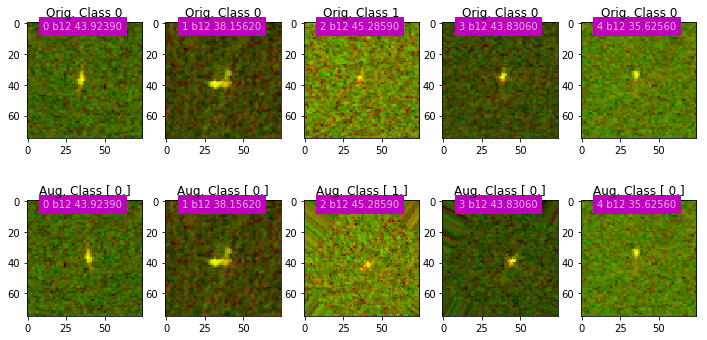

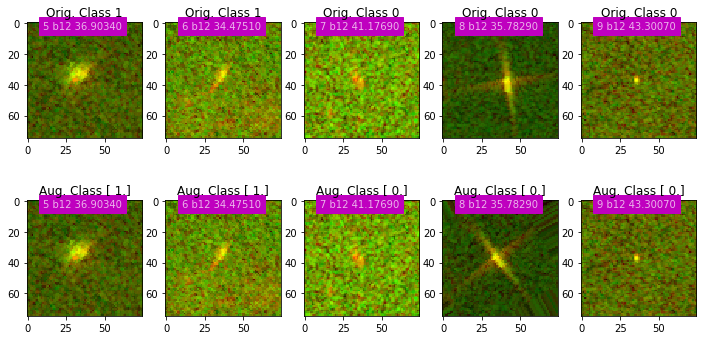

In [14]:
display_data_augmentations(trainval_ds, train_aug_ds, max_datapoints=10)

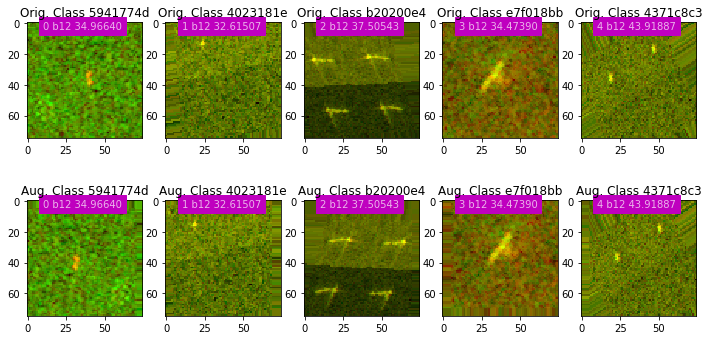

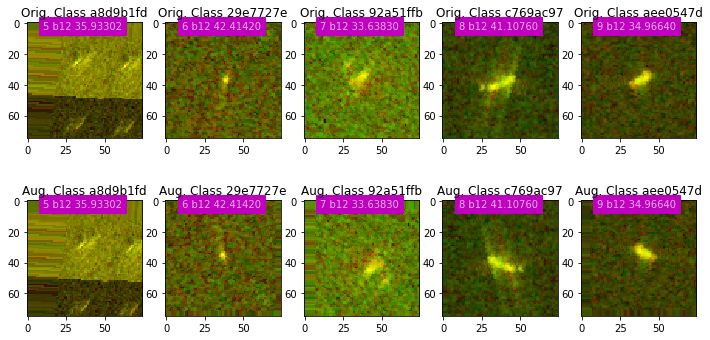

In [36]:
display_data_augmentations(test_ds, test_aug_ds, max_datapoints=10)

x:  <class 'torch.FloatTensor'> torch.Size([2, 75, 75]) -0.2084464132785797 0.017939018085598946 -0.2348998636007309 0.012047681957483292
y:  <class 'torch.FloatTensor'> torch.Size([1])
x:  <class 'torch.FloatTensor'> torch.Size([2, 75, 75]) -0.1107146292924881 0.21140557527542114 -0.09983961284160614 0.22586502134799957
y:  <class 'torch.FloatTensor'> torch.Size([1])
x:  <class 'torch.FloatTensor'> torch.Size([2, 75, 75]) -0.1394559144973755 0.13642171025276184 -0.1353108286857605 0.10668763518333435
y:  <class 'torch.FloatTensor'> torch.Size([1])
x:  <class 'torch.FloatTensor'> torch.Size([2, 75, 75]) -0.22562623023986816 0.039507314562797546 -0.22562623023986816 0.039507314562797546
y:  <class 'torch.FloatTensor'> torch.Size([1])
x:  <class 'torch.FloatTensor'> torch.Size([2, 75, 75]) -0.13931481540203094 0.11556103080511093 -0.1699608713388443 0.09594287723302841
y:  <class 'torch.FloatTensor'> torch.Size([1])


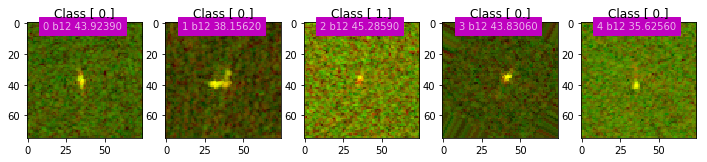

In [37]:
display_dataset(train_aug_ds, max_datapoints=5, show_info=True)

x:  <class 'torch.FloatTensor'> torch.Size([2, 75, 75]) -0.10331012308597565 0.2831946015357971 -0.08894254267215729 0.26772546768188477
y:  <class 'str'> 8
x:  <class 'torch.FloatTensor'> torch.Size([2, 75, 75]) -0.3069380223751068 0.20349660515785217 -0.38164833188056946 0.20349660515785217
y:  <class 'str'> 8
x:  <class 'torch.FloatTensor'> torch.Size([2, 75, 75]) -0.29579561948776245 0.5852508544921875 -0.29579561948776245 0.5852508544921875
y:  <class 'str'> 8
x:  <class 'torch.FloatTensor'> torch.Size([2, 75, 75]) -0.1498565524816513 0.29987770318984985 -0.2984412610530853 0.29271888732910156
y:  <class 'str'> 8
x:  <class 'torch.FloatTensor'> torch.Size([2, 75, 75]) -0.26134005188941956 0.2678515613079071 -0.26134005188941956 0.2678515613079071
y:  <class 'str'> 8
x:  <class 'torch.FloatTensor'> torch.Size([2, 75, 75]) -0.18501952290534973 0.6456627249717712 -0.2036045789718628 0.7422385215759277
y:  <class 'str'> 8
x:  <class 'torch.FloatTensor'> torch.Size([2, 75, 75]) -0.4100

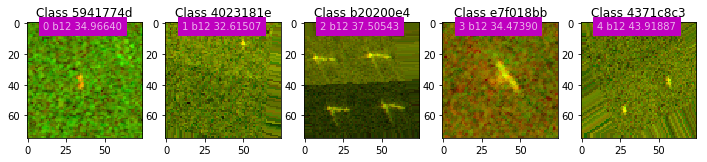

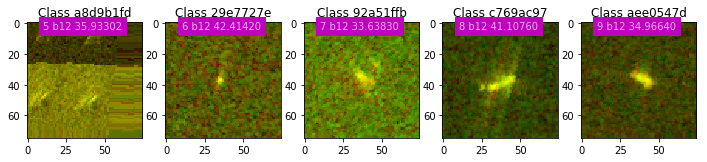

In [43]:
display_dataset(test_aug_ds, max_datapoints=10, show_info=True)

In [31]:
CONFIG = {
    'batch_size': 10,
    'num_workers': 12,
    'n_splits': 10,
    'val_size': 0.10,

    'seed': 12345
}

In [33]:
y_array = []
x_array = []
for i, ((x, a), y) in enumerate(trainval_ds):
    y_array.append(y)
    x_array.append(i)    

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
# Stratified split:        
sssplit = StratifiedShuffleSplit(n_splits=CONFIG['n_splits'], 
                                 test_size=CONFIG['val_size'], 
                                 random_state=CONFIG['seed'])
train_indices, val_indices = next(sssplit.split(x_array, y_array))

In [35]:
from torch.utils.data.sampler import SubsetRandomSampler
train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

In [39]:
train_batches = OnGPUDataLoader(train_aug_ds,
                                batch_size=CONFIG['batch_size'],
                                sampler=train_sampler,
                                num_workers=CONFIG['num_workers'],
                                drop_last=True,
                                pin_memory=True)

val_batches = OnGPUDataLoader(val_aug_ds,
                              batch_size=CONFIG['batch_size'],
                              sampler=val_sampler,
                              num_workers=CONFIG['num_workers'],
                              drop_last=True,
                              pin_memory=True)

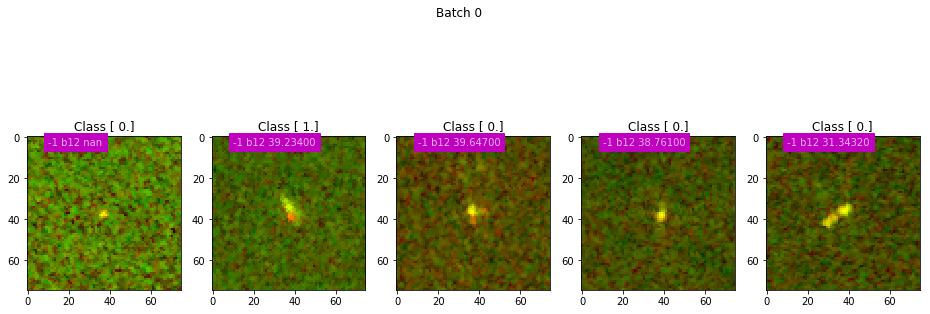

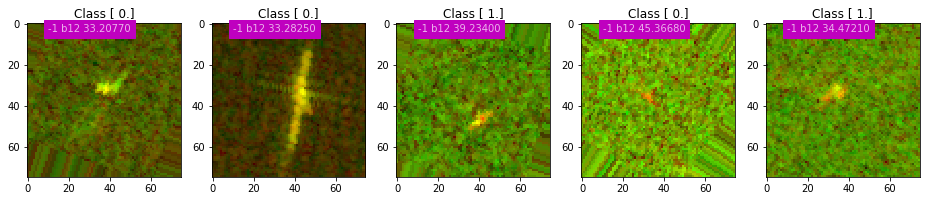

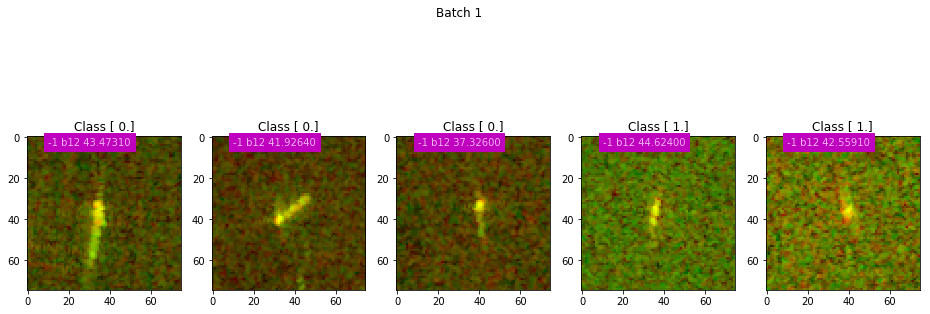

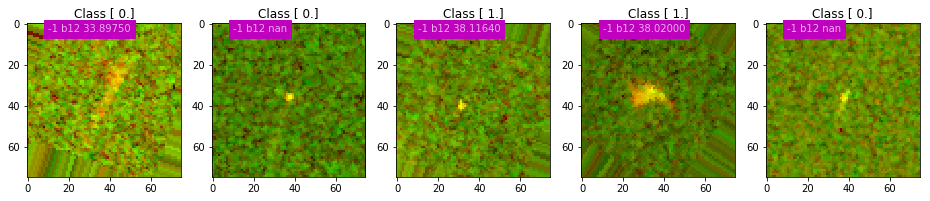

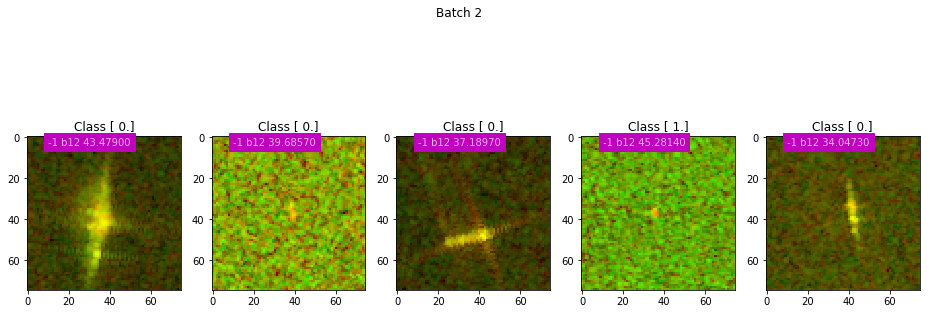

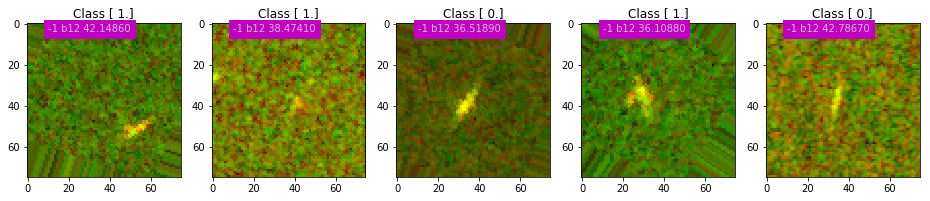

In [40]:
display_batches(train_batches)